In [4]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
#import tensorflow.compat.v2 as tf
#import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [5]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [6]:
data.head(15)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [7]:
data = data.sample(frac = 1)
data = data[:200000]

In [8]:
print("dataset shape:", data.shape)

dataset shape: (200000, 6)


In [9]:
data.head(10)

,polarity,id,date,query,user,text
310439,0,2001101857,Mon Jun 01 23:50:47 PDT 2009,NO_QUERY,eyats05,wishes she had a digicam. http://plurk.com/p/...
4680,0,1468879342,Tue Apr 07 04:12:30 PDT 2009,NO_QUERY,UnboundUrchin,"@mmauran ahh, i don't know! i'm not escaping, ..."
838280,4,1559036970,Sun Apr 19 10:05:09 PDT 2009,NO_QUERY,LizzytheLezzy,"@uncleaimee alrighty, that's fab i'll let you..."
514906,0,2190726572,Tue Jun 16 03:33:14 PDT 2009,NO_QUERY,puvsta,my nose hurts and it looks ike ive ben snortng...
46767,0,1677485614,Sat May 02 02:19:48 PDT 2009,NO_QUERY,shecal,brought the lil' girl with me down south!!! Wh...
717302,0,2259959304,Sat Jun 20 18:26:35 PDT 2009,NO_QUERY,nitevoli,@yoitsjo_____nah i know. bad day injured pa a...
279196,0,1991721068,Mon Jun 01 07:32:47 PDT 2009,NO_QUERY,ChiliCheez,I broke my little toe ... again.
14258,0,1553612208,Sat Apr 18 14:44:16 PDT 2009,NO_QUERY,MzGriff0610,"WooHoo hubby is home, time to get something to..."
82247,0,1752996231,Sat May 09 23:44:05 PDT 2009,NO_QUERY,titorandolph,@officialTila y wont u talk 2 me no more?
875123,4,1680310878,Sat May 02 11:23:17 PDT 2009,NO_QUERY,ken147,Going to a party!!!!


In [10]:
data['polarity'].unique()

array([0, 4], dtype=int64)

In [11]:
#Replacing teh value 4 ---> 1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4, 1)

In [12]:
data.head()

,polarity,id,date,query,user,text
310439,0,2001101857,Mon Jun 01 23:50:47 PDT 2009,NO_QUERY,eyats05,wishes she had a digicam. http://plurk.com/p/...
4680,0,1468879342,Tue Apr 07 04:12:30 PDT 2009,NO_QUERY,UnboundUrchin,"@mmauran ahh, i don't know! i'm not escaping, ..."
838280,1,1559036970,Sun Apr 19 10:05:09 PDT 2009,NO_QUERY,LizzytheLezzy,"@uncleaimee alrighty, that's fab i'll let you..."
514906,0,2190726572,Tue Jun 16 03:33:14 PDT 2009,NO_QUERY,puvsta,my nose hurts and it looks ike ive ben snortng...
46767,0,1677485614,Sat May 02 02:19:48 PDT 2009,NO_QUERY,shecal,brought the lil' girl with me down south!!! Wh...


In [13]:
data.describe()

,polarity,id
count,200000.00000,2.000000e+05
mean,0.49906,1.998666e+09
std,0.50000,1.938412e+08
min,0.00000,1.467813e+09
25%,0.00000,1.956862e+09
50%,0.00000,2.002013e+09
75%,1.00000,2.177150e+09
max,1.00000,2.329203e+09


In [14]:
#Check the number of positive vs negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the dataset:         {}',format(data.shape[0]))
print('No. of positive tagged sentences:    {}',format(len(positives)))
print('No. of Negative tagged sentences:    {}',format(len(negatives)))

Total length of the dataset:         {} 200000
No. of positive tagged sentences:    {} 99812
No. of Negative tagged sentences:    {} 100188


In [15]:
#get a word count per text
def word_count(words):
    return len(words.split())

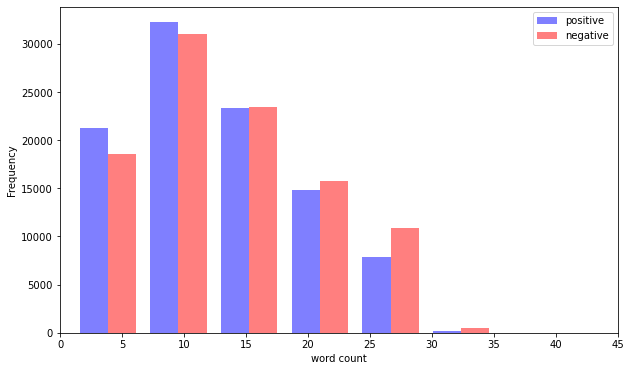

In [16]:
#positive word count distribution for both positive and negative
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(10, 6))
plt.xlim(0, 45)
plt.xlabel('word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color = ['b', 'r'], alpha = 0.5, label = ['positive', 'negative'])
plt.legend(loc = 'upper right')


In [17]:
#get common words in the training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        if(len(word) > 2):
            all_words.append(word.lower())
Counter(all_words).most_common(5)

[('the', 64842),
 ('and', 36617),
 ('you', 29399),
 ('for', 26985),
 ('have', 18024)]

### Data Preprocessing

<AxesSubplot:xlabel='polarity', ylabel='count'>

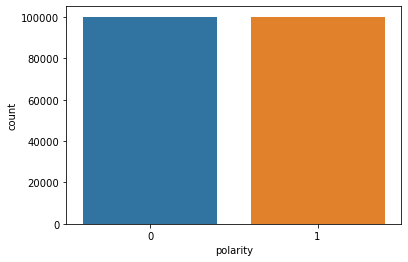

In [18]:
%matplotlib inline
sns.countplot(data['polarity'])#to barplot the function

In [19]:
data.drop(['date', 'query', 'user', 'word count'], axis = 1, inplace = True)

In [20]:
data.drop('id',axis = 1, inplace = True)

In [21]:
data.head(7)

,polarity,text
310439,0,wishes she had a digicam. http://plurk.com/p/...
4680,0,"@mmauran ahh, i don't know! i'm not escaping, ..."
838280,1,"@uncleaimee alrighty, that's fab i'll let you..."
514906,0,my nose hurts and it looks ike ive ben snortng...
46767,0,brought the lil' girl with me down south!!! Wh...
717302,0,@yoitsjo_____nah i know. bad day injured pa a...
279196,0,I broke my little toe ... again.


In [22]:
#checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [23]:
#converting pandas object into a string type
data['text'] = data['text'].astype('str')

In [24]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sheeba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stopword = set(stopwords.words('english'))
print(stopword)

{'to', 'than', 'any', 'me', 'off', 'needn', "you've", "doesn't", 'you', 'o', 'here', 're', "that'll", 'its', "wasn't", 'your', 'is', 'out', 'few', 'while', 'such', 'mustn', "wouldn't", 'when', 've', 'on', 'shan', 'her', 'down', 'now', 'these', 'wasn', 's', "haven't", 'who', 'as', 'what', 'no', 'those', 'couldn', 'after', 'over', "shouldn't", 'because', 'during', 'myself', 'been', 'ourselves', 'ain', "you'll", 'isn', 'she', "weren't", 'same', 'whom', 'before', 'ours', 'wouldn', 'both', 'so', 'by', 'the', 'my', 'hadn', 'd', "should've", 'themselves', 'haven', "mustn't", 'up', 'above', "she's", 'had', 'we', 'yours', 'were', 'why', 'other', "you'd", 'herself', 'he', 'that', 'each', "couldn't", 't', 'further', "needn't", 'or', 'but', 'only', 'doing', 'where', 'under', 'their', 'mightn', 'be', 'has', 'them', 'some', 'into', 'am', 'did', 'a', 'yourself', 'theirs', 'if', 'more', 'are', 'at', 'will', 'in', 'how', 'can', "it's", 'between', 'through', 'do', 'being', "hadn't", 'then', 'not', 'belo

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sheeba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sheeba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
    #lower casing
    tweet = tweet.lower()
    tweet = tweet[1:]
    #Removing all urls
    tweet = re.sub(urlPattern, '', tweet)
    #Removing all @username
    tweet = re.sub(userPattern, '', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #remove stopwords
    final_tokens = [w for w in tokens if w not in stopword]
    #Reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords = []
    for w in final_tokens:
        if len(w) > 1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

In [29]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [30]:
data.head(10)

,polarity,text,processed_tweets
310439,0,wishes she had a digicam. http://plurk.com/p/...,ishes digicam
4680,0,"@mmauran ahh, i don't know! i'm not escaping, ...",mmauran ahh dont know im escaping really dnt k...
838280,1,"@uncleaimee alrighty, that's fab i'll let you...",uncleaimee alrighty thats fab ill let know pub...
514906,0,my nose hurts and it looks ike ive ben snortng...,nose hurt look ike ive ben snortng coke
46767,0,brought the lil' girl with me down south!!! Wh...,rought lil girl south quotruffquot ride poor t...
717302,0,@yoitsjo_____nah i know. bad day injured pa a...,yoitsjonah know bad day injured pa ako hehe ca...
279196,0,I broke my little toe ... again.,broke little toe
14258,0,"WooHoo hubby is home, time to get something to...",oohoo hubby home time get something eat bball ...
82247,0,@officialTila y wont u talk 2 me no more?,officialtila wont talk
875123,1,Going to a party!!!!,oing party


### Analyzing the data
Now we are going to analyse the preprocessed data to get an understanding of it. we'll plot word clouds for positive and negative tweets from our dataset and see which words occur the most

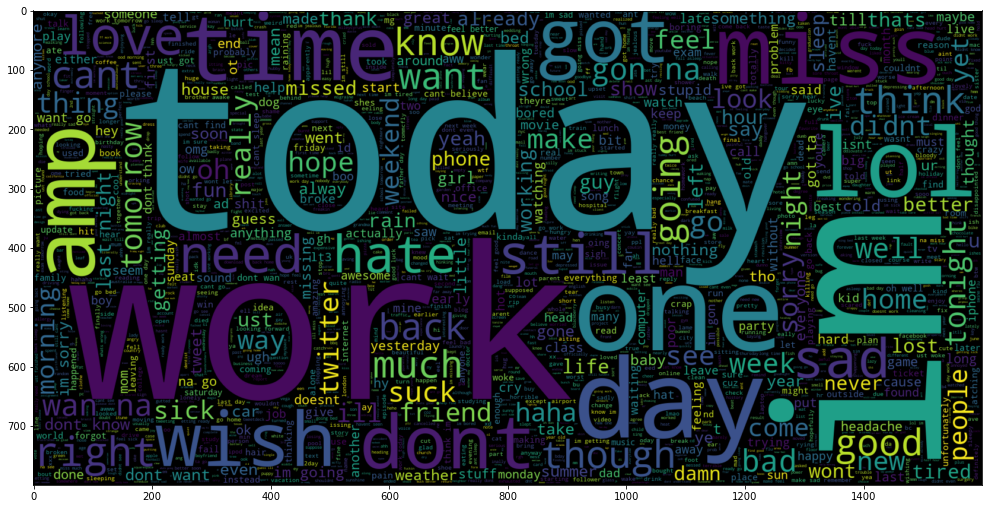

In [31]:
plt.figure(figsize = (17, 17))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data[data.polarity == 0].
                                                                              processed_tweets))
plt.imshow(wc, interpolation = 'bilinear')

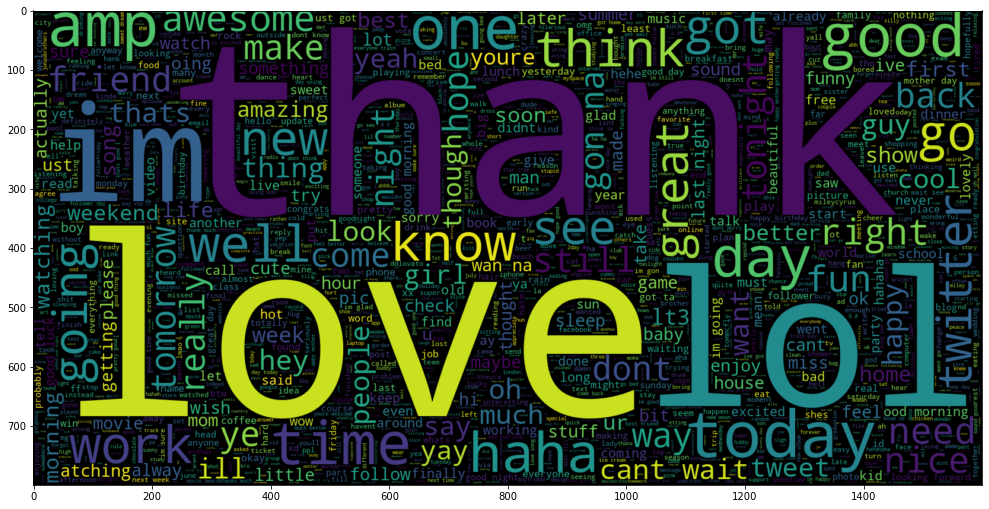

In [32]:
plt.figure(figsize = (17, 17))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data[data.polarity == 1].
                                                                              processed_tweets))
plt.imshow(wc, interpolation = 'bilinear')

In [33]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [34]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


#### Convert text to word frequency vectors
TF-IDF
this is an acronym that stands fot term frequency - inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency- This summarizes how often a given word appears within a document
Inverse Document Frequency - This downscales words that appear a lot across documents

In [35]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  170104


In [36]:
print(X.shape)
print(y.shape)

(200000, 170104)
(200000,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [38]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170104)
y_train (160000,)

X_test (40000, 170104)
y_test (40000,)


### Model Building

In [39]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train = model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test = model.score(X_test, y_test)
    
    print('Accuracy of model on training data : '.format(acc_train*100))
    print('Accuracy of model on testing data : '.format(acc_test*100))
    
    #predict values for test dataset
    y_pred = model.predict(X_test)
    
    #print the evaluation mmetrics for the test data
    print(classification_report(y_test, y_pred))
    
    #compute and plot confusion matrix
    cf_matrix = confusion_matrix(y_test, y_test)
    
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Nag', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds', fmt = '', xticklabels = categories,
               yticklabels = categories)
    
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title("Confusion Matrix" , fontdict = {'size':18}, pad = 20)
    
    
    

    

Accuracy of model on training data : 
Accuracy of model on testing data : 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     20108
           1       0.76      0.80      0.78     19892

    accuracy                           0.77     40000
   macro avg       0.78      0.77      0.77     40000
weighted avg       0.78      0.77      0.77     40000



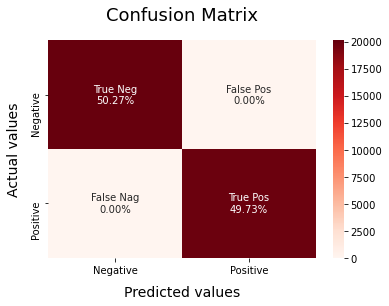

In [40]:
lg = LogisticRegression()
history = lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 
Accuracy of model on testing data : 
              precision    recall  f1-score   support

           0       0.75      0.78      0.77     20108
           1       0.77      0.74      0.76     19892

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



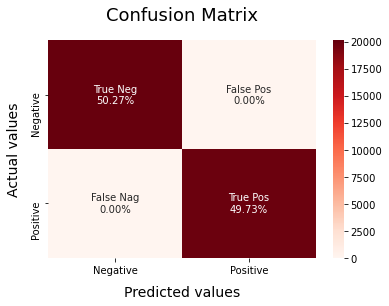

In [41]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [42]:
import pickle


In [40]:
file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('LogisticRegression.pickle', 'wb')
pickle.dump(lg, file)
file.close()

file = open('NaiveBayes.pickle', 'wb')
pickle.dump(nb, file)
file.close()


In [43]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [44]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [60]:
tweets = list(data_actual.processed_tweets)

if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    #text = ["I love machine learning",
            #"today a bad day",
            #"it is not bad"]
    #text1 = tweet_list
    
    #df = predict(vectoriser, lg, text)
    df = predict(vectoriser, lg, tweets)
    print(df.head())

                                                text sentiment
0  covidー19 covid19 vaccine vaccinepassports vacc...  Positive
1  covidー19 covid19 vaccine vaccinepassports vacc...  Positive
2  covidー19 covid19 vaccine vaccinepassports vacc...  Positive
3  covidー19 covid19 vaccine vaccinepassports vacc...  Positive
4  tiny percentage vaccinated people getting covi...  Positive


In [61]:
df.sentiment.value_counts()

Positive    73
Negative    43
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

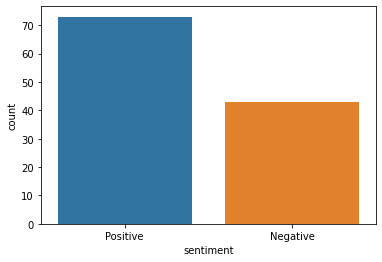

In [62]:
sns.countplot(df.sentiment)

## Actual Data

In [51]:
data_actual = pd.read_csv('covid1.csv')
data_actual.head()

,Username,Handle,Timestamp,Comments,Likes,Retweets,Text
0,TF Venom-001,@001_venom,2021-05-15T00:31:36.000Z,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,NaN,4.0,2.0
1,TF Venom-001,@001_venom,2021-05-15T00:11:40.000Z,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,NaN,NaN,NaN
2,TF Venom-001,@001_venom,2021-05-15T00:06:01.000Z,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,NaN,NaN,NaN
3,TF Venom-001,@001_venom,2021-05-14T22:41:10.000Z,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,NaN,NaN,NaN
4,E.H. Hau #Resist #Persist,@ActionTime,2021-05-14T19:21:36.000Z,VERY Tiny Percentage of #Vaccinated People are...,1.0,1.0,NaN


In [52]:
tweet = data_actual.Comments
tweet

0      #COVIDー19 #COVID19 #vaccine #VaccinePassports ...
1      #COVIDー19 #COVID19 #vaccine #VaccinePassports ...
2      #COVIDー19 #COVID19 #vaccine #VaccinePassports ...
3      #COVIDー19 #COVID19 #vaccine #VaccinePassports ...
4      VERY Tiny Percentage of #Vaccinated People are...
                             ...                        
111    Please RT: \n\nAttention San Diego health care...
112    DAILY POLL: Are you concerned that politicians...
113    #MikeAdams Situation Update, Jan 1st - #Trump ...
114    Should we be concerned?\n#COVID19 #COVIDIOTS #...
115    #Covid #Covid19 #Corona #Coronavirus #SARSCoV2...
Name: Comments, Length: 116, dtype: object

In [53]:
data_actual.drop(['Username', 'Handle', 'Timestamp', 'Likes', 'Retweets', 'Text'], axis = 1, inplace = True)
#data.drop('id',axis = 1, inplace = True)

In [54]:
#data_actual.drop('id',axis = 1, inplace = True)

In [55]:
#data_actual['processed_tweets'] = data_actual['text'].apply(lambda x: process_tweets(x))
#print('Text Preprocessing complete.')
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
    #lower casing
    tweet = tweet.lower()
    tweet = tweet[0:]
    #Removing all urls
    tweet = re.sub(urlPattern, '', tweet)
    #Removing all @username
    tweet = re.sub(userPattern, '', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #remove stopwords
    final_tokens = [w for w in tokens if w not in stopword]
    #Reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords = []
    for w in final_tokens:
        if len(w) > 1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

In [56]:
data_actual['processed_tweets'] = data_actual['Comments'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [57]:
data_actual.head(10)

,Comments,processed_tweets
0,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,covidー19 covid19 vaccine vaccinepassports vacc...
1,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,covidー19 covid19 vaccine vaccinepassports vacc...
2,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,covidー19 covid19 vaccine vaccinepassports vacc...
3,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,covidー19 covid19 vaccine vaccinepassports vacc...
4,VERY Tiny Percentage of #Vaccinated People are...,tiny percentage vaccinated people getting covi...
5,http://Wa.me/919013151515\nEnter Pin code and ...,pin code get vaccination slot near pin locatio...
6,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,covidー19 covid19 vaccine vaccinepassports vacc...
7,#COVIDー19 #COVID19 #vaccine #VaccinePassports ...,covidー19 covid19 vaccine vaccinepassports vacc...
8,This \n\nThis pandemic pantomime needs to end ...,pandemic pantomime need end lie controlling fe...
9,#NEWS | Researchers are now analyzing how peop...,news researcher analyzing people primary immun...


In [58]:
data_actual.drop(['Comments'], axis = 1, inplace = True)

In [59]:
data_actual.head(10)

,processed_tweets
0,covidー19 covid19 vaccine vaccinepassports vacc...
1,covidー19 covid19 vaccine vaccinepassports vacc...
2,covidー19 covid19 vaccine vaccinepassports vacc...
3,covidー19 covid19 vaccine vaccinepassports vacc...
4,tiny percentage vaccinated people getting covi...
5,pin code get vaccination slot near pin locatio...
6,covidー19 covid19 vaccine vaccinepassports vacc...
7,covidー19 covid19 vaccine vaccinepassports vacc...
8,pandemic pantomime need end lie controlling fe...
9,news researcher analyzing people primary immun...
